#TABLE OF CONTENTS.
1) Project Overview

2) Importing Libraries

3) Importing Dataset

4) Exploratory Data Analysis (EDA)

5) Data Visualization

6) Model Building and Evaluation

    6.1 Logistic Regression
    6.2 Decision Tree
    6.3 Random Forest
    6.4 SVM

7) Model Selection

8) Fine-tuning the Model

9) Best Model Evaluation

10) Conclusion


# Theory

Breast cancer diagnosis involves identifying malignant (cancerous) and benign (non-cancerous) breast tumors. This is crucial for early detection and treatment. The diagnosis is typically based on features extracted from medical images of breast tissue. Machine learning models, trained on labeled data, can automate and improve the accuracy of this diagnostic process. The models analyze various features such as texture, shape, and size of the tumor to predict its nature, thereby aiding healthcare professionals in making informed decisions.



**Objective**: Identify malignant (cancerous) and benign (non-cancerous) breast tumors for early detection and treatment.

**Method**: Analyze features extracted from medical images of breast tissue.

**Features**: Include texture, shape, and size of the tumor.

**Machine Learning**: Train models on labeled data to automate and improve diagnostic accuracy.

**Outcome**: Predict the nature of the tumor, assisting healthcare professionals in making informed decisions.

# 1) Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import library for handling warnings
import warnings
warnings.filterwarnings('ignore')

# 2) IMPORTING DATASET.

In [ ]:
data = pd.read_csv('Breast_cancer_data.csv')


# 3 - EDA (EXPLORATORY DATA ANALYSIS).

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head().to_string(index=False))  # it will print diagnosis column continue rather then starting from the new line.

First few rows of the dataset:
 mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  diagnosis
       17.99         10.38          122.80     1001.0          0.11840          0
       20.57         17.77          132.90     1326.0          0.08474          0
       19.69         21.25          130.00     1203.0          0.10960          0
       11.42         20.38           77.58      386.1          0.14250          0
       20.29         14.34          135.10     1297.0          0.10030          0


In [ ]:
# Display summary statistics
print("\nSummary statistics:")
print(data.describe().to_string(index=False))


Summary statistics:
 mean_radius  mean_texture  mean_perimeter   mean_area  mean_smoothness  diagnosis
  569.000000    569.000000      569.000000  569.000000       569.000000 569.000000
   14.127292     19.289649       91.969033  654.889104         0.096360   0.627417
    3.524049      4.301036       24.298981  351.914129         0.014064   0.483918
    6.981000      9.710000       43.790000  143.500000         0.052630   0.000000
   11.700000     16.170000       75.170000  420.300000         0.086370   0.000000
   13.370000     18.840000       86.240000  551.100000         0.095870   1.000000
   15.780000     21.800000      104.100000  782.700000         0.105300   1.000000
   28.110000     39.280000      188.500000 2501.000000         0.163400   1.000000


In [ ]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None


In [ ]:
# Checking for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())



Checking for missing values:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [ ]:
# Display the distribution of the target variable
print("\nDistribution of target variable:")
print(data['diagnosis'].value_counts())


Distribution of target variable:
diagnosis
1    357
0    212
Name: count, dtype: int64


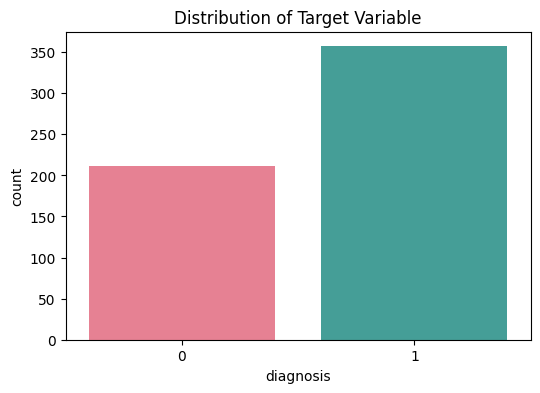

In [ ]:
# Plotting the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=data, palette='husl')
plt.title('Distribution of Target Variable')
plt.show()

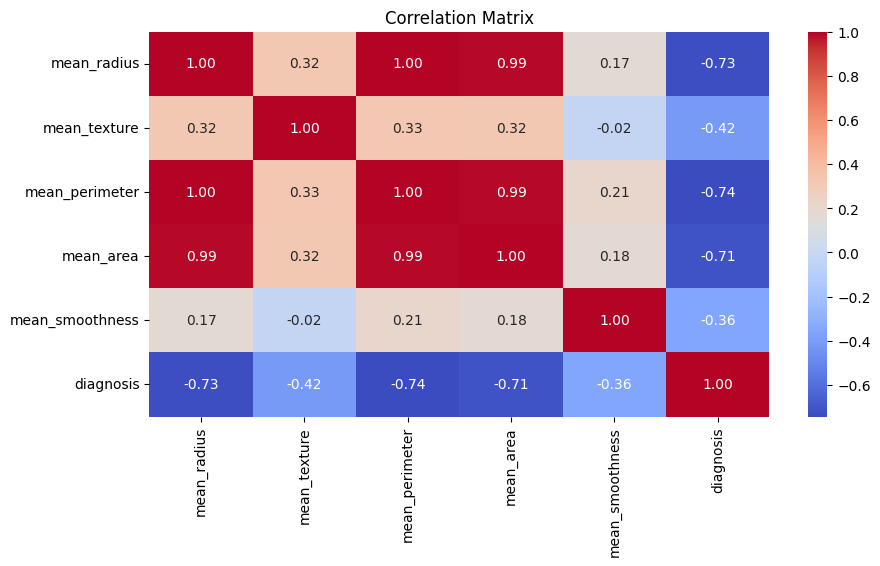

In [ ]:
# Visualizing the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

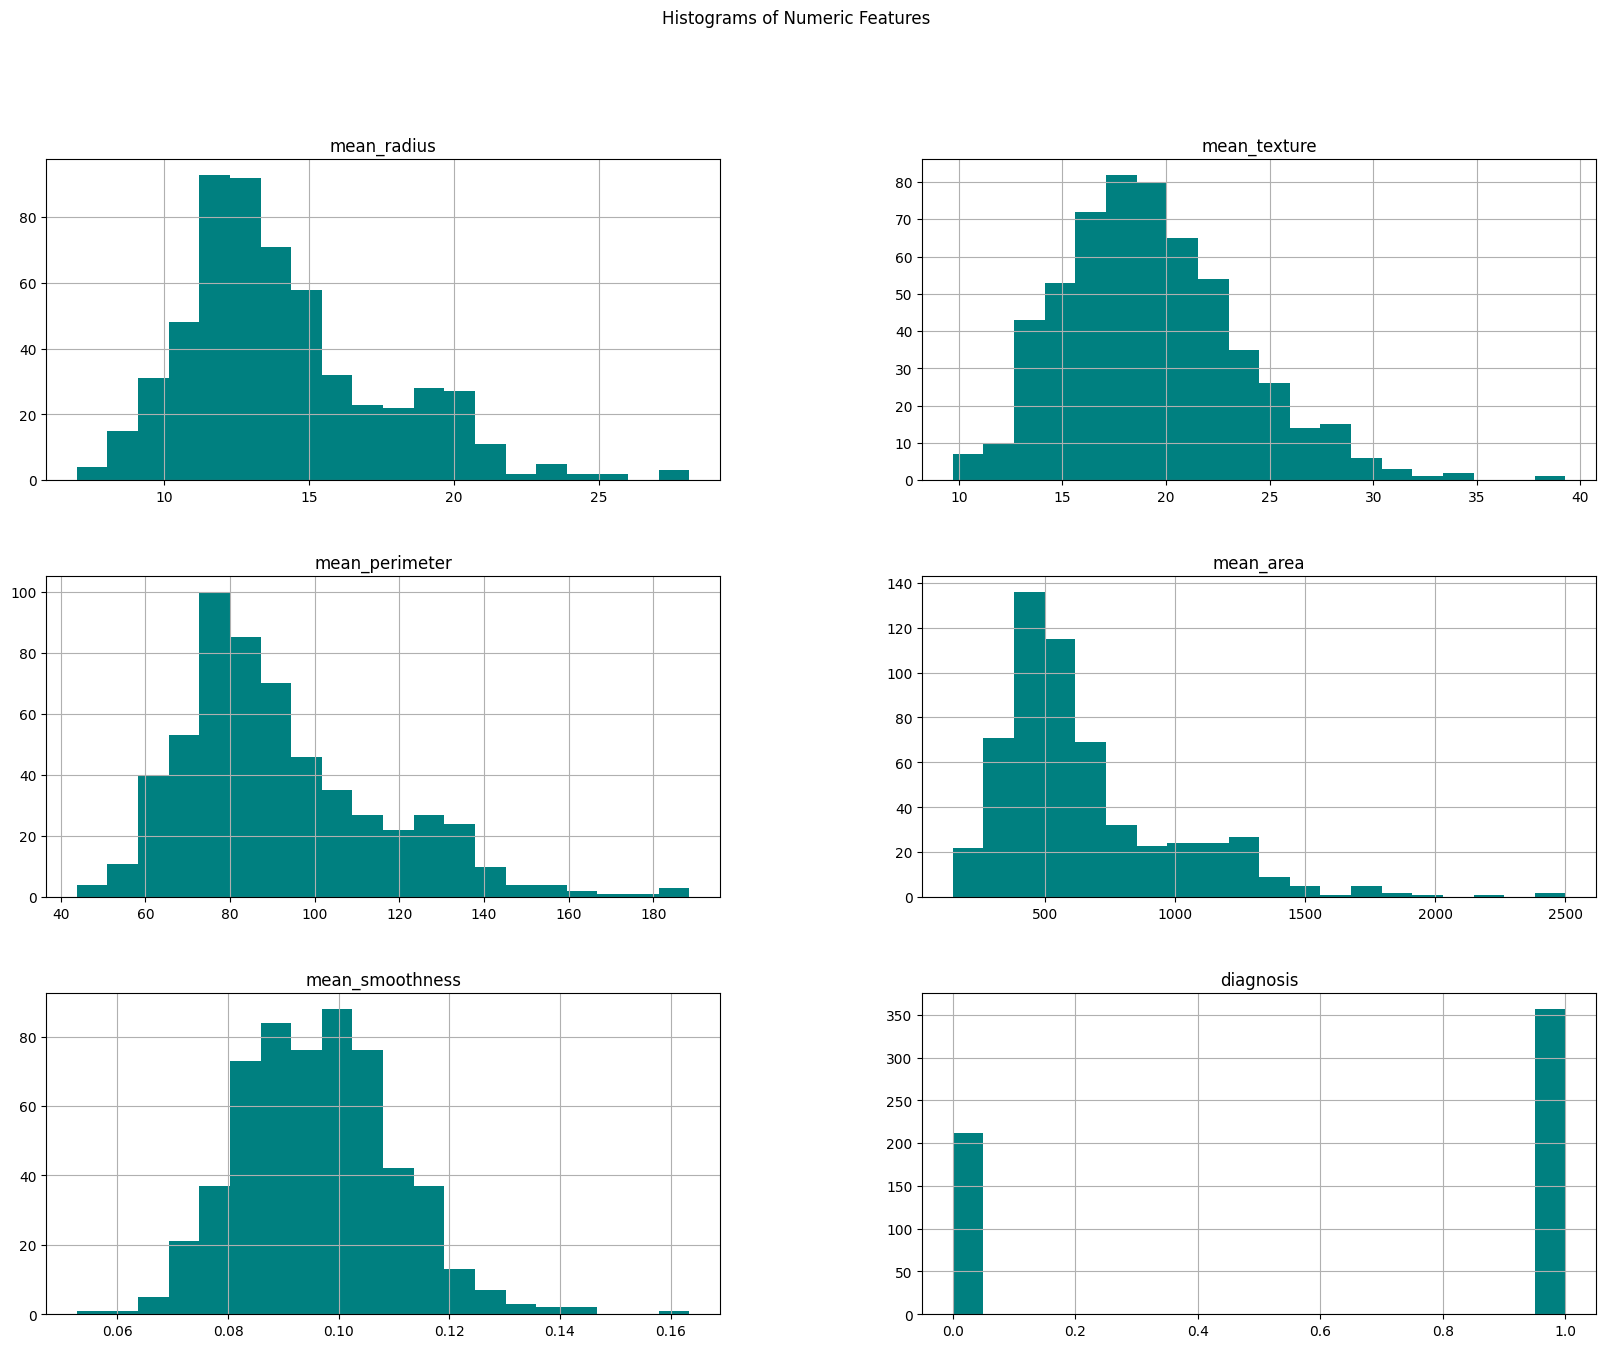

In [ ]:
# Plotting histograms for all numeric features
data.hist(bins=20, figsize=(20,15), color='teal')
plt.suptitle('Histograms of Numeric Features')
plt.show()

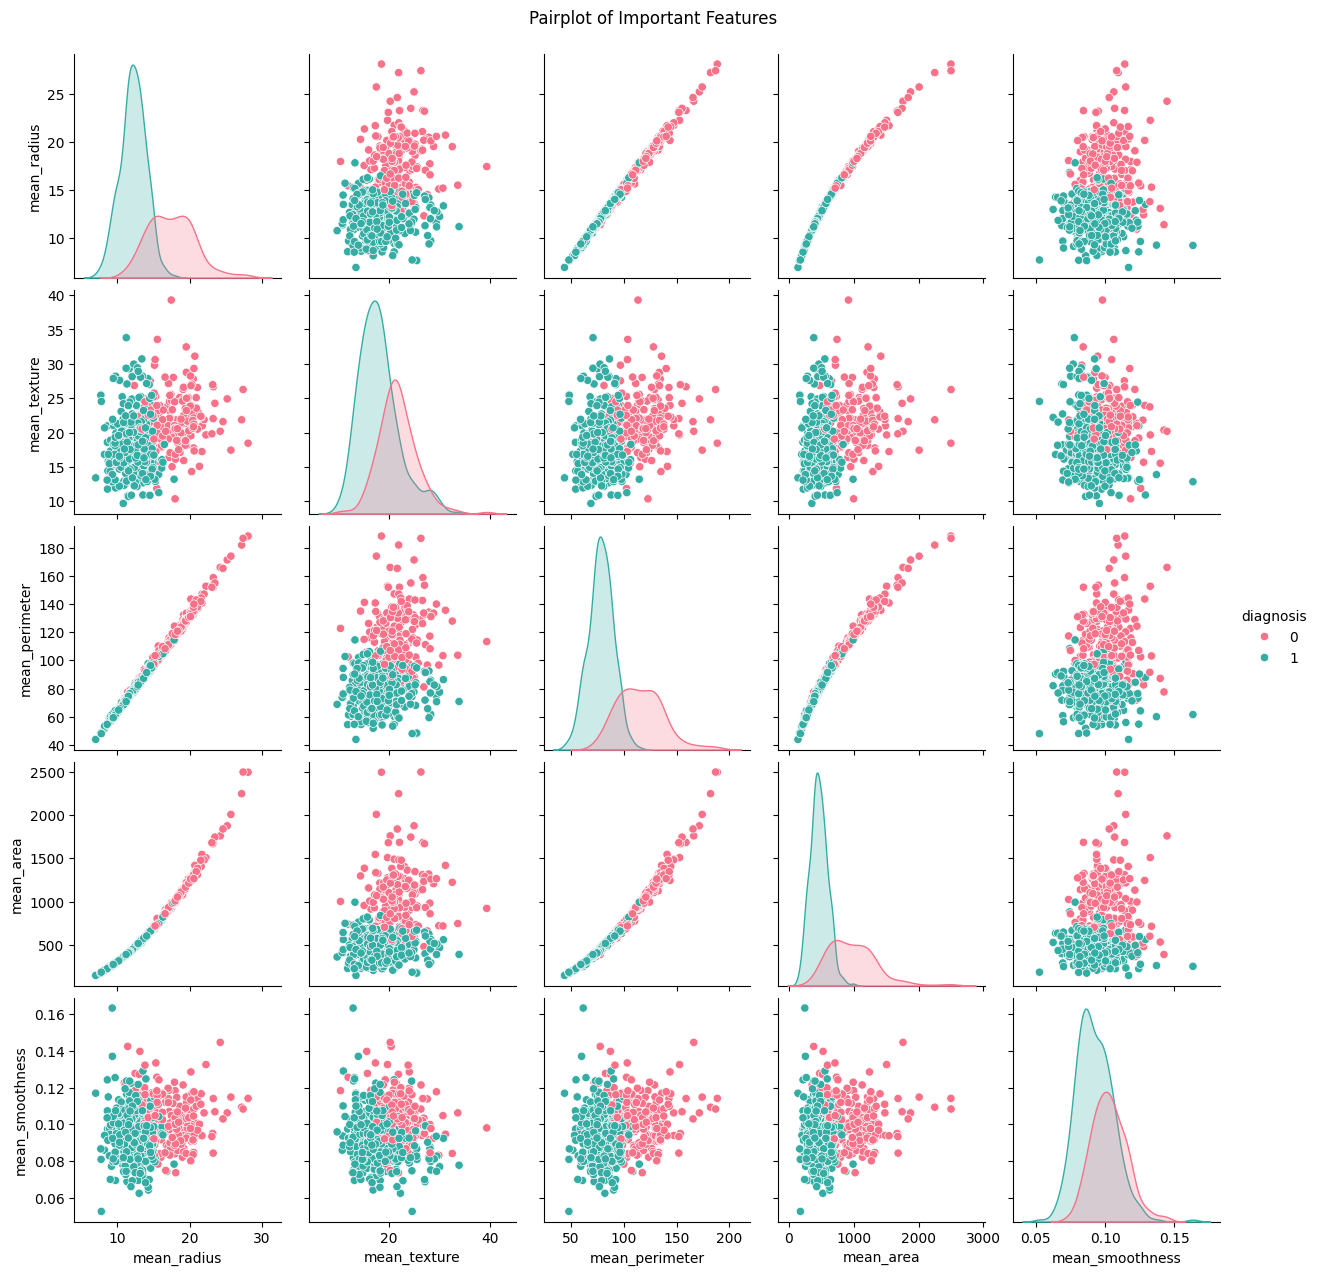

In [ ]:
# Plotting pairplot for some important features
important_features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']
sns.pairplot(data[important_features], hue='diagnosis', palette='husl')
plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()

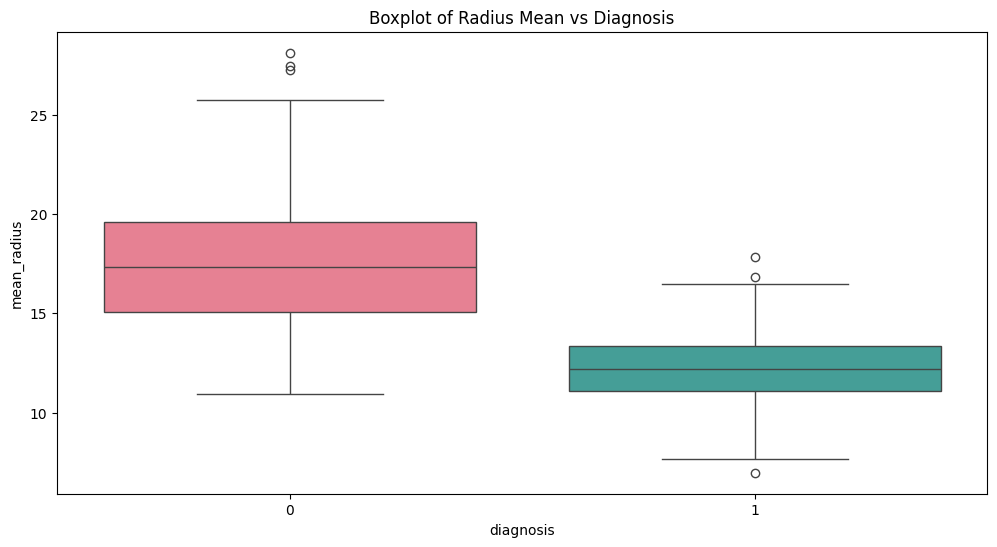

In [ ]:
# Visualizing relationships between features and target variable using boxplots
plt.figure(figsize=(12,6))
sns.boxplot(x='diagnosis', y='mean_radius', data=data, palette='husl')
plt.title('Boxplot of Radius Mean vs Diagnosis')
plt.show()

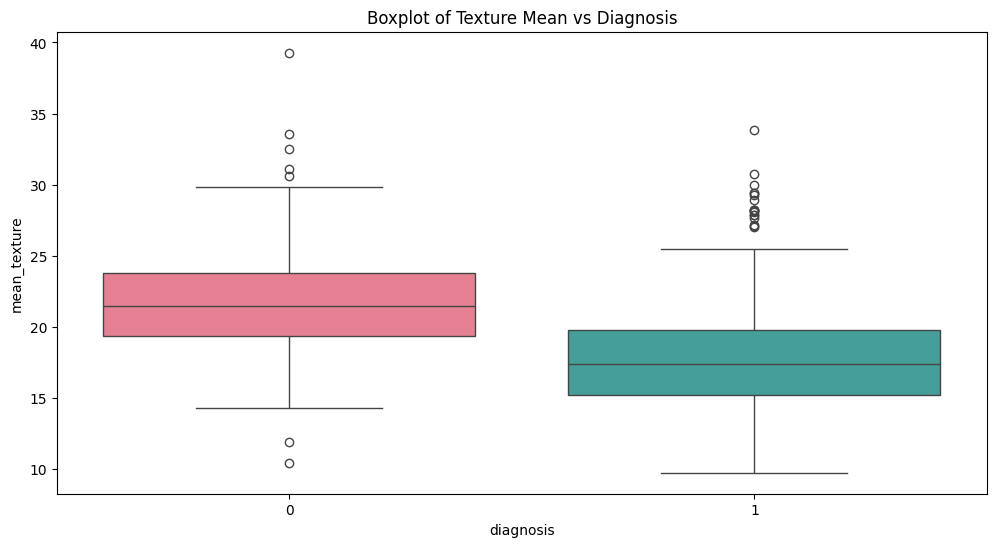

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='diagnosis', y='mean_texture', data=data, palette='husl')
plt.title('Boxplot of Texture Mean vs Diagnosis')
plt.show()

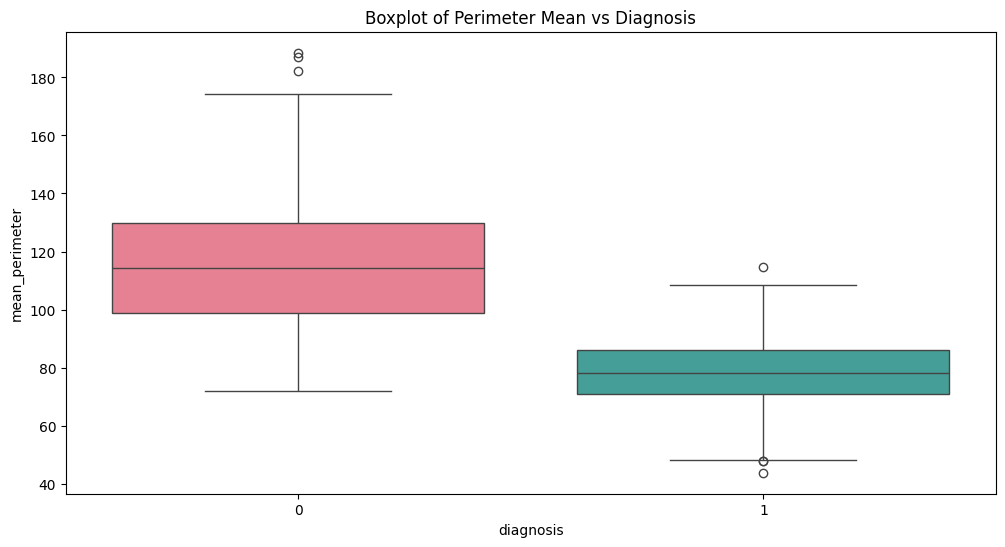

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='diagnosis', y='mean_perimeter', data=data, palette='husl')
plt.title('Boxplot of Perimeter Mean vs Diagnosis')
plt.show()

# Data Visualization
#Mean Radius Distribution

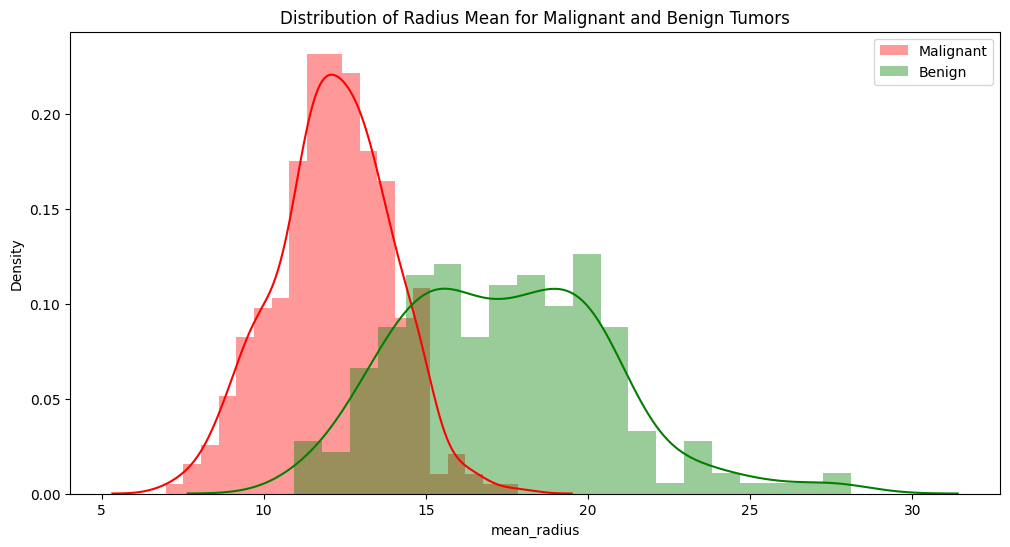

In [ ]:
# Visualizing the distribution of features
plt.figure(figsize=(12,6))
sns.distplot(data[data['diagnosis'] == 1]['mean_radius'], bins=20, label='Malignant', color='red')
sns.distplot(data[data['diagnosis'] == 0]['mean_radius'], bins=20, label='Benign', color='green')
plt.title('Distribution of Radius Mean for Malignant and Benign Tumors')
plt.legend()
plt.show()

# Mean Texture Distribution

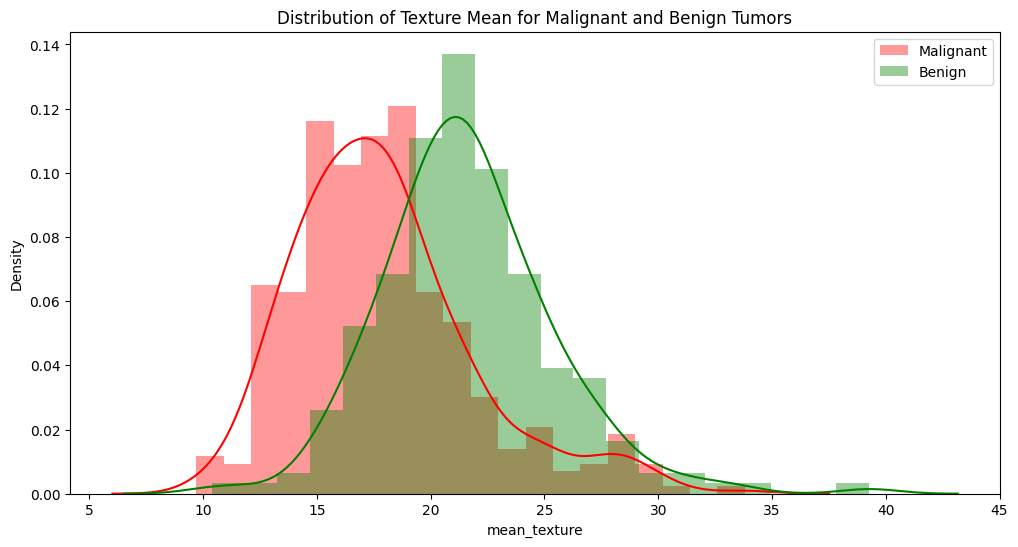

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(data[data['diagnosis'] == 1]['mean_texture'], bins=20, label='Malignant', color='red')
sns.distplot(data[data['diagnosis'] == 0]['mean_texture'], bins=20, label='Benign', color='green')
plt.title('Distribution of Texture Mean for Malignant and Benign Tumors')
plt.legend()
plt.show()

# Mean Perimeter Distribution

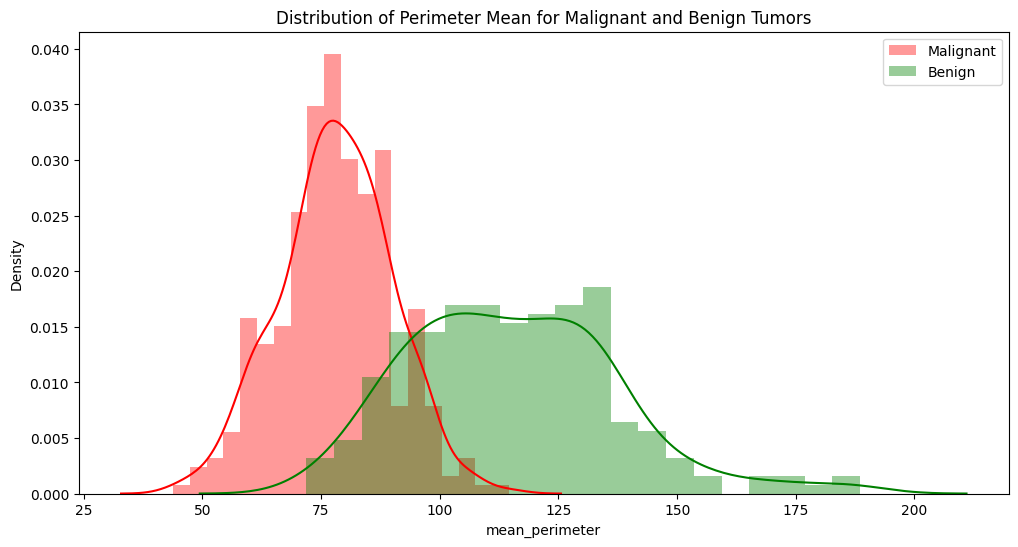

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(data[data['diagnosis'] == 1]['mean_perimeter'], bins=20, label='Malignant', color='red')
sns.distplot(data[data['diagnosis'] == 0]['mean_perimeter'], bins=20, label='Benign', color='green')
plt.title('Distribution of Perimeter Mean for Malignant and Benign Tumors')
plt.legend()
plt.show()


# Mean Area Distribution

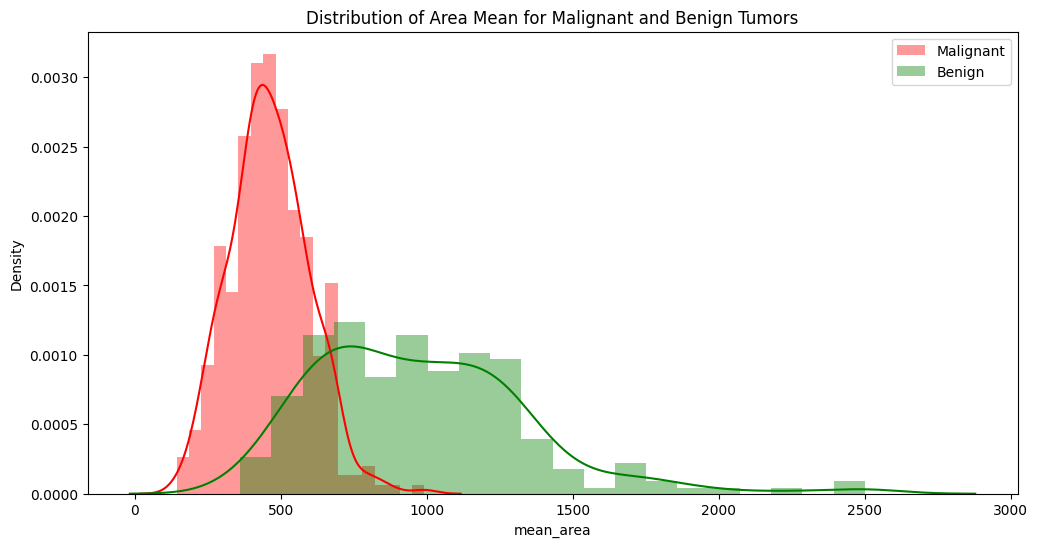

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(data[data['diagnosis'] == 1]['mean_area'], bins=20, label='Malignant', color='red')
sns.distplot(data[data['diagnosis'] == 0]['mean_area'], bins=20, label='Benign', color='green')
plt.title('Distribution of Area Mean for Malignant and Benign Tumors')
plt.legend()
plt.show()


# Mean Smoothness Distribution

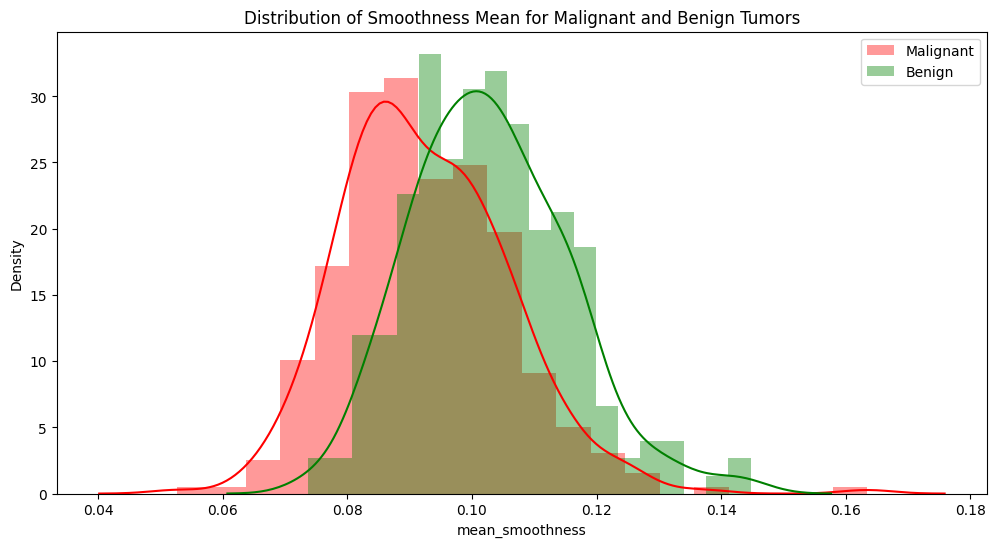

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(data[data['diagnosis'] == 1]['mean_smoothness'], bins=20, label='Malignant', color='red')
sns.distplot(data[data['diagnosis'] == 0]['mean_smoothness'], bins=20, label='Benign', color='green')
plt.title('Distribution of Smoothness Mean for Malignant and Benign Tumors')
plt.legend()
plt.show()

In [ ]:
# Split Data into Train and Test Sets
from sklearn.model_selection import train_test_split

X = data.drop('diagnosis', axis=1)  # Features
y = data['diagnosis']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#  Import Models and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}


In [ ]:
# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.95      0.89      0.92        71

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

--------------------------------------------------
Model: Random Forest
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.

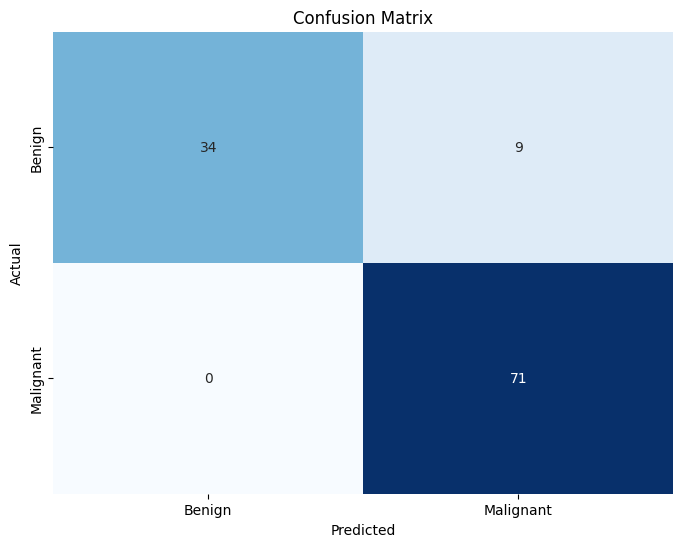

In [ ]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming you have already evaluated your models and stored their accuracy scores
model_accuracies = {
    'Logistic Regression': 0.93,
    'Decision Tree': 0.90,
    'Random Forest': 0.95,
    'SVM': 0.92
}

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"Best Model: {best_model}")
print(f"Accuracy: {best_accuracy:.2f}")


Best Model: Random Forest
Accuracy: 0.95


# Fine-tuning the Model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Use the best model found by GridSearchCV
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nEvaluation on Test Set (Best Model):")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Accuracy: 0.9208791208791208

Evaluation on Test Set (Best Model):
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

